# Working with decision trees along with some exploratory data analysis

### Setup
We'll use the wine quality dataset.  
If you have not downloaded it already, do it now from: https://archive.ics.uci.edu/ml/datasets/Wine+Quality  


_Once downloaded, create a folder 'data' in the same folder as this notebook, create another folder in 'data' called 'wine' and copy the files into 'wine'._

In [1]:
# import basic libraries
import numpy as np
import matplotlib
import pandas as pd
import seaborn
import os

In [2]:
red_wine_file = "./data/wine/winequality-red.csv"
# Just check if the file you've entered is at the right path...
# print (os.path.abspath(red_wine_file))
# Load the CSV data into a dataframe - notice haw we have specified the delimiter
red_wine_data = pd.read_csv(red_wine_file, sep=";")
# Describe the data in the file - this returns a dataframe
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Obsesrvations:
- We see that the data in some columns is spread out (like 'free sulfur dioxide' and 'total sulfur dioxide' columns)  
- ...and is fairly close to the average in others (like the 'density' column).  

##### An intution about the percentiles
Let's say we sort the entire red wine data on a column, say pH, in ascending order.
The top of the list will then be the minimum value of pH, traversing 25% down the list will be the 25th percentile value, the 50th percentile in the middle, then the 75th percentile and the last record will indicate the highest pH.  
Let's look at some raw data and plot some of it:

In [3]:
# list the top 5 rows of the red wine data
red_wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# list the last 5 rows of the red wine data
red_wine_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# value_counts() gives the count of uniue values in a dataset
print(red_wine_data["pH"].value_counts())

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
3.29    46
3.32    45
3.34    43
3.28    42
3.35    39
3.20    39
3.22    39
3.31    39
3.40    37
3.37    37
3.33    37
3.21    36
3.16    36
3.27    35
3.15    34
3.41    34
3.42    33
3.23    32
3.18    30
3.44    29
3.24    29
3.17    27
3.25    26
3.19    25
3.46    22
        ..
3.03     6
3.00     6
3.68     5
3.01     5
2.98     5
2.94     4
2.92     4
3.62     4
3.69     4
3.66     4
3.71     4
2.89     4
3.72     3
3.67     3
3.63     3
2.93     3
4.01     2
2.99     2
3.78     2
2.88     2
3.90     2
3.85     1
3.75     1
2.74     1
2.86     1
2.95     1
3.74     1
2.87     1
2.90     1
3.70     1
Name: pH, Length: 89, dtype: int64


In [6]:
red_wine_desc=red_wine_data.describe()

'''
# if you want to explore the internals of the describe() dict
# Here's how the describe dict is structured:
# keys
print(red_wine_desc['pH'])
# columns in each record
print(red_wine_desc['pH']['std'])
# how would one access all the values of standard deviation for all keys?
print([(element,type(element), red_wine_desc[element]['std']) for element in red_wine_desc])
std_list = [red_wine_desc[element]['std'] for element in red_wine_desc]
std_list'''

"\n# if you want to explore the internals of the describe() dict\n# Here's how the describe dict is structured:\n# keys\nprint(red_wine_desc['pH'])\n# columns in each record\nprint(red_wine_desc['pH']['std'])\n# how would one access all the values of standard deviation for all keys?\nprint([(element,type(element), red_wine_desc[element]['std']) for element in red_wine_desc])\nstd_list = [red_wine_desc[element]['std'] for element in red_wine_desc]\nstd_list"

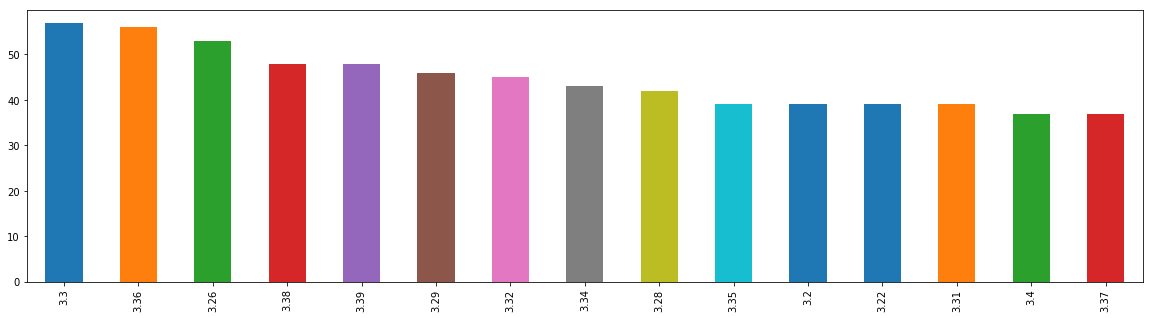

In [7]:
# plot the # of unique occurances for pH values
red_wine_data["pH"].value_counts().head(15).plot(kind='bar',figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B656A86D8>,
      dtype=object)

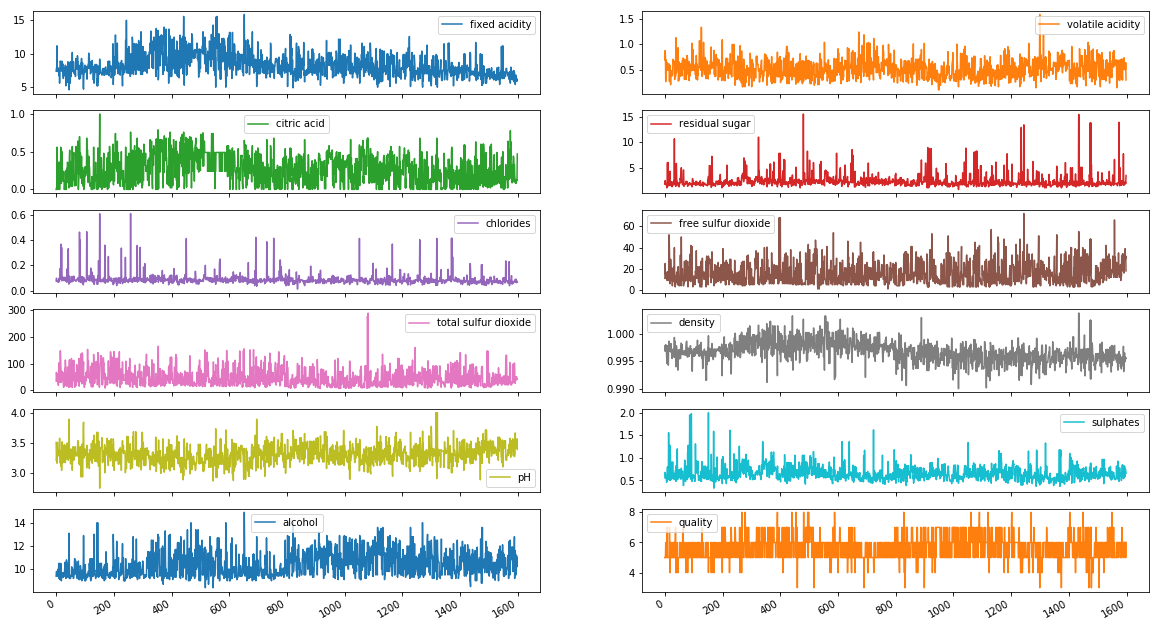

In [8]:
# plot the movement of features for all observations
red_wine_data.plot(kind='line',figsize=(20,20),subplots=True,layout=(10,2))

In [9]:
# (unhelpful) - histograms for everything:
# red_wine_data.plot(kind='hist',figsize=(20,30),subplots=True,layout=(10,3))

let's dig deeper

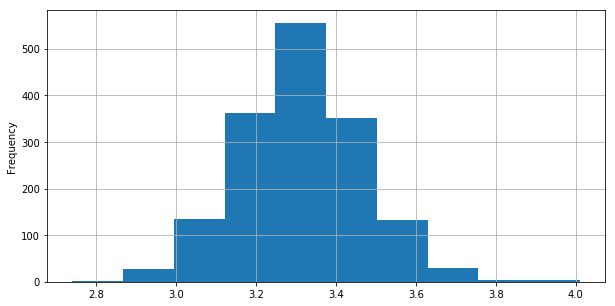

In [52]:
# histogram for just pH
red_wine_data["pH"].plot(kind='hist',figsize=(10,5), grid=True, bins=10)

In [53]:
# skew 
red_wine_data["pH"].skew()

0.19368349811284427

In [55]:
# kurtosis
red_wine_data["pH"].kurt()

0.806942508246574

#### Observations
- most of the wines have a pH between 3.2 and 3.4
- very few are highly acidic (close to 2.0) or very neutral (close to 4.0)
- It seems that there's a slight skew towards higher acidity - more wines have acidity closer to 2.0 than to 4.0
- Positive values of skew means data is **skewed right**
  - *right* here means that the right tail is *longer* than the left tail
- Negative values would mean data is skewed left, but that's not what we are observing...
- Kurtosis calculated is 'excess kurtosis' - its a measure of how long the tails are, positive meaning heavy tails, negative - light tails, in this case it seems that the tails of our normal distribution tend towards the heavier side

#### Note
The 'skew' is also called the Fisher-Pearson coefficient.
Here is a good explanation of skew and kurtosis: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

## Selecting data for modelling
Now we can't use all available columns to build a model that can predict the quality of a wine. 
- Some of the features may have very little impact on quality
- It would be computationally expensive and inefficient to build a model with so many features.

So let's select some that show large correlation *and* vary a lot

_Note: there are better ways of selecting features, we are using intution here for simplicity's sake_

Let's start by thinking about some questions:
- What does the quality of a wine depend upon?
- how does the quality of a wine correlate to the various features we have observed?

In [18]:
# let's compute the correlation matrix to see which features strongly correlate to each other
red_wine_corr = red_wine_data.corr()
red_wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


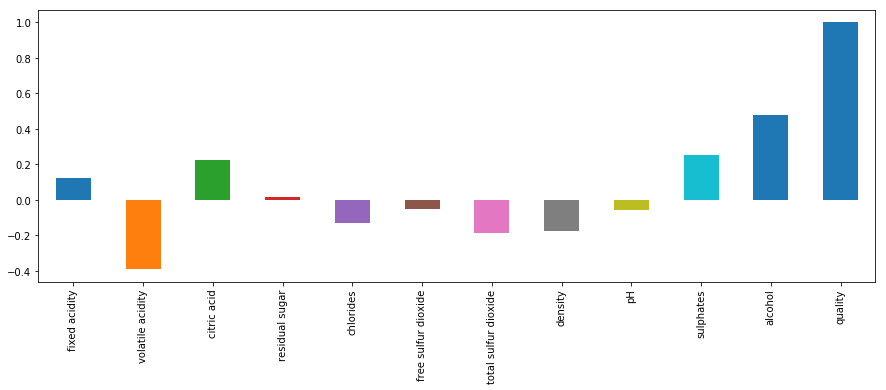

In [15]:
# the matrix is cool, but a visual is cooler
# lets find out how the quality correlates to each of the features
red_wine_corr['quality'].plot(kind='bar',figsize=(15,5))

#### Observations
- amount of fixed acidity, citric acid, sulphates and alcohol seem to **positively** correlate with quality - so an increase in these may improve the quality - we'll have to check.
- amount of volatile acidity, chlorides, total sulfur dioxide and the density of the liquid seem to **negatively** correlate with quality - so an increase in these may reduce the quality - we'll have to check.

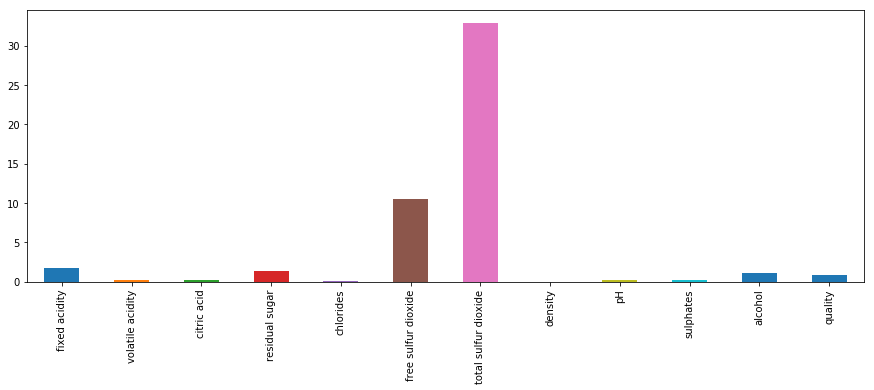

In [17]:
# and the standard deviation for each feature
red_wine_data.std().plot(kind='bar', figsize=(15,5))

#### Observations
- for the positive correlations
  - fixed acidity: seems to change by a significant amount, so may be useful for our model
  - citric acid: seems to change very little, it appears this may not be as useful, will revisit this if our model is not accurate enough
  - sulphates: ditto sulphates - change very little, so we'll remember this, but not use in our model upfront
  - alcohol: again seems significant - let's keep it
- for the negative correlations
  - volatile acidity: low change, let's ignore for now
  - chlorides: low change, let's ignore for now
  - total sulfur dioxide: huge change! let's consider this for our model
  - density: very little change, let's ignore for now
  
#### Initial selection
Based on our anaysis, we'd like to select the following features for the purposes of modelling:
- fixed acidity
- alcohol
- total sulfur dioxide  

Also, remember that our **prediction target** is the *quality* of the wine.

In [25]:
# prediction target or 'y'
y = red_wine_data['quality']
# chosen features
interesting_features = ['fixed acidity','alcohol','total sulfur dioxide']
X = red_wine_data[interesting_features]
# want to look at X?
# X.head()
X.describe()

,fixed acidity,alcohol,total sulfur dioxide
count,1599.000000,1599.000000,1599.000000
mean,8.319637,10.422983,46.467792
std,1.741096,1.065668,32.895324
min,4.600000,8.400000,6.000000
25%,7.100000,9.500000,22.000000
50%,7.900000,10.200000,38.000000
75%,9.200000,11.100000,62.000000
max,15.900000,14.900000,289.000000
